In [35]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
from dotenv import load_dotenv

load_dotenv()

ODS_API_KEY = os.getenv("ODS_API_KEY")
ODS_PAYSAGE_KEY = os.getenv("ODS_PAYSAGE_KEY")

AFFILIATION_MATCHER_API = f"{os.getenv('AFFILIATION_MATCHER_URL')}/match"
AFFILIATION_MATCHER_LIST_API = "http://localhost:5004/match_list"
AFFILIATION_MATCHER_LIST_TASK_API = "http://localhost:5004/tasks"

In [36]:

MATCH_TYPE_RNSR = "rnsr"
COL_RNSR_ID = "identifiant_rnsr"
COL_PAYSAGE_ID = "identifiant_interne"
COL_STATE = "etat"
COL_YEAR = "date_fermeture"
COL_ACRONYM = "sigle"
COL_COUNTRY = "pays_etranger_acheminement"
COL_NAME = "uo_lib"
COL_NAME_OFF = "uo_lib_officiel"
COL_AFFILIATION_STR = "affiliation_string"
COL_AFFILIATION_STR_OFF = "affiliation_string_off"
COL_AFFILIATION_MATCH = "affiliation_match"
COL_AFFILIATION_MATCH_OFF = "affiliation_match_off"
COL_AFFILIATION_IS_MATCH = "affiliation_is_match"
COL_AFFILIATION_IS_MATCH_OFF = "affiliation_is_match_off"

In [37]:
# api/match
def affiliation_get_matches(affiliation: str, year=None):
  if not isinstance(affiliation, str):
    return None
  
  body = {"type": MATCH_TYPE_RNSR, "query": affiliation}
  if year:
    body["year"] = year

  res=requests.post(url = AFFILIATION_MATCHER_API, json= body)

  if res.status_code == 202:
    return res.json()
  
  raise Exception("ERROR_{res.status_code}")

# indice find
def elastic_percolate(indice, query):
  url = "http://localhost:9200"
  body = { "query": {"percolate": {"field": "query", "document": { "content": query}}}}
  res = requests.post(f"{url}/{indice}/_search", json=body)
  return res.json()

In [38]:
df = pd.read_json("../paysage_match_list.json")
df.head(5)

,identifiant_rnsr,identifiant_interne,etat,date_fermeture,sigle,uo_lib,uo_lib_officiel,adresse_uai,lieu_dit_uai,boite_postale_uai,code_postal_uai,localite_acheminement_uai,pays_etranger_acheminement,affiliation_string,affiliation_string_off,affiliation_match,affiliation_match_off,affiliation_is_match,affiliation_is_match_off
0,None,kx72i,True,NaN,None,Bibliothèque du Centre d'Histoire et d'Archéol...,Bibliothèque du Centre d'Histoire et d'Archéol...,14 Avenue Berthelot,None,None,69007,Lyon,France,Bibliothèque du Centre d'Histoire et d'Archéol...,None,[199412070A],[],MATCH.NO_ID_MATCH,None
1,None,yL2k2,True,NaN,None,Bibliothèque de l'IUT Lumière - Lyon 2,Bibliothèque de l'IUT Lumière - Lyon 2,160 Boulevard de l'Université,None,None,69500,Bron,France,"Bibliothèque de l'IUT Lumière - Lyon 2, 160 Bo...",None,[],[],MATCH.NO_ID_NO_MATCH,None
2,200516413Y,V27ua,False,2013.0,None,Modèles et méthodes de l'évaluation thérapeuti...,Modèles et méthodes de l'évaluation thérapeuti...,16 rue Henri Huchard,None,None,75018,Paris,France,Modèles et méthodes de l'évaluation thérapeuti...,None,[200516413Y],[],MATCH.ID_MATCH,None
4,201722467B,uZI6L,True,NaN,LiRIS,Laboratoire interdisciplinaire de recherche en...,Laboratoire interdisciplinaire de recherche en...,Place du Recteur Henri Le Moal,None,CS 24307,35043,Rennes Cedex,France,Laboratoire interdisciplinaire de recherche en...,None,[201722467B],[],MATCH.ID_MATCH,None
5,None,aJreF,True,NaN,None,Bibliothèque Universitaire Arts et Multimédia ...,Bibliothèque Universitaire Arts et Multimédia ...,2 allée du Promontoire,None,None,93160,Noisy-le-Grand,France,Bibliothèque Universitaire Arts et Multimédia ...,None,[],[],MATCH.NO_ID_NO_MATCH,None


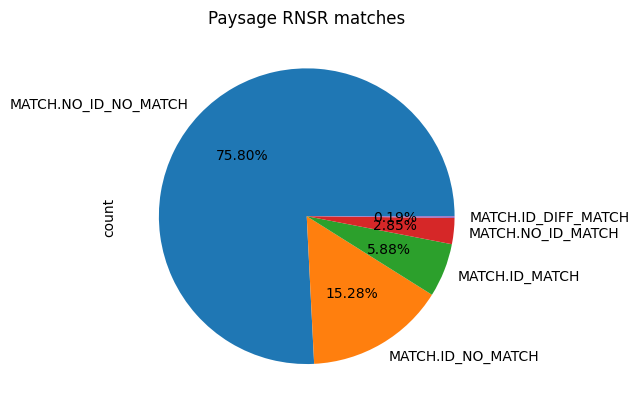

In [39]:
df[COL_AFFILIATION_IS_MATCH].value_counts().plot.pie(title="Paysage RNSR matches", autopct="%.02f%%")
plt.show()

DIFF_MATCH

In [40]:
df_diff_match = df[df[COL_AFFILIATION_IS_MATCH] == "MATCH.ID_DIFF_MATCH"]

In [44]:
test = df_diff_match.iloc[1]
display(test)
print(test[COL_AFFILIATION_STR])
affiliation_get_matches(test[COL_AFFILIATION_STR])

identifiant_rnsr                                                     200415163U
identifiant_interne                                                       7nB0w
etat                                                                      False
date_fermeture                                                           2007.0
sigle                                                                     CEMAR
uo_lib                        Centre d'études du Moyen Âge et de la Renaissance
uo_lib_officiel               Centre d'études du Moyen Âge et de la Renaissance
adresse_uai                                                                None
lieu_dit_uai                                                               None
boite_postale_uai                                                          None
code_postal_uai                                                            None
localite_acheminement_uai                                                  None
pays_etranger_acheminement              

Centre d'études du Moyen Âge et de la Renaissance, France


{'enriched_results': [{'acronym': [],
   'city': ['Nancy'],
   'id': '200112411R',
   'name': ['Moyen-âge', 'MOYEN-AGE']},
  {'acronym': [],
   'city': ['Nancy'],
   'id': '200919765Z',
   'name': ['MOYEN-ÂGE', 'Moyen Âge', 'MOYEN-AGE']}],
 'highlights': {'rnsr_name;rnsr_city': {'200112411R': {'rnsr_name': [['centre études <em>moyen âge</em> renaissance, france']]},
   '200919765Z': {'rnsr_name': [['centre études <em>moyen âge</em> renaissance, france']]}},
  'rnsr_name;rnsr_zone_emploi': {'200112411R': {'rnsr_name': [['centre études <em>moyen âge</em> renaissance, france']],
    'rnsr_zone_emploi': [["centre d'études du <em>moyen</em> âge et de la renaissance, france"]]},
   '200919765Z': {'rnsr_name': [['centre études <em>moyen âge</em> renaissance, france']],
    'rnsr_zone_emploi': [["centre d'études du <em>moyen</em> âge et de la renaissance, france"]]}}},
 'index_date': '20240206',
 'other_ids': [{'id': '19541508800010', 'type': 'siren'},
  {'id': '180089013', 'type': 'siren'},
 

In [57]:
indice = "matcher-20240403142252_rnsr_zone_emploi"
query = "NAncy"
elastic_percolate(indice, query)

{'took': 10,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 1, 'relation': 'eq'},
  'max_score': 0.13076457,
  'hits': [{'_index': 'matcher-20240403142252_rnsr_zone_emploi',
    '_type': '_doc',
    '_id': 'w51YpI4BPvL_AhgNeq_S',
    '_score': 0.13076457,
    '_source': {'rnsrs': ['200510635T',
      '200510685X',
      '200112411R',
      '200112412S',
      '200112437U',
      '200112438V',
      '200112440X',
      '200112441Y',
      '200510689B',
      '199712674U',
      '200112504S',
      '200312522C',
      '199712570F',
      '199712586Y',
      '199712606V',
      '199712607W',
      '199712608X',
      '197612609P',
      '199412610M',
      '199712611A',
      '199712612B',
      '199212613Z',
      '199112614E',
      '199712615E',
      '199213347X',
      '199213351B',
      '199213352C',
      '199213353D',
      '199213354E',
      '199213355F',
      '199213356G',
      '199213357H',
      '1992

In [56]:
data = download_insee_data()

c:\Users\vbarbier\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.insee.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


ValueError: Unable to read workbook: could not read stylesheet from C:\Users\vbarbier\AppData\Local\Temp\tmp7z53pjue/ZE2020_au_01-01-2023.xlsx.
This is most probably because the workbook source files contain some invalid XML.
Please see the exception for more details.